In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

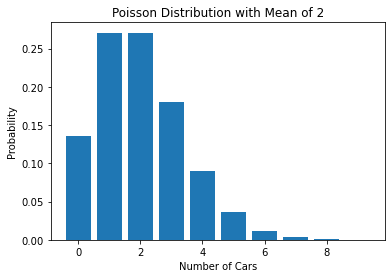

In [219]:
car_mean= 2
x = np.arange(0,10)
y = stats.poisson(car_mean).pmf(x)

plt.bar(x,y)
plt.title('Poisson Distribution with Mean of 2')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.show()

In [228]:
# What is the probability that no cars drive up in the noon hour?
no_cars_at_noon = stats.poisson(car_mean).pmf(0) * 100
print(f"There is {no_cars_at_noon.round(2)}% chance no cars come through at noon")
# What is the probability that 3 or more cars come through the drive through?
three_or_more = stats.poisson(car_mean).sf(2) * 100
print(f"There is {three_or_more.round(2)}% chance three or more cars come through")
# How likely is it that the drive through gets at least 1 car?
at_least1 = stats.poisson(car_mean).sf(0) * 100
print(f"There is {at_least1.round(2)}% chance of at least one car will come through")

There is 13.53% chance no cars come through at noon
There is 32.33% chance three or more cars come through
There is 86.47% chance of at least one car will come through


In [233]:
no_cars_sim = (np.random.poisson(2,100_000) == 0).mean() *100
print(f"There is {no_cars_sim.round(2)}% chance no cars come through at noon")
three_or_more_sim = (np.random.poisson(2,100_000) >= 3).mean()*100
print(f"There is {three_or_more_sim.round(2)}% chance three or more cars come through")
at_least1_sim = (np.random.poisson(2,100_000) >0).mean() *100
print(f"There is {at_least1_sim.round(2)}% chance of at least one car will come through")

There is 13.51% chance no cars come through at noon
There is 32.26% chance three or more cars come through
There is 86.46% chance of at least one car will come through


2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [244]:
grade_mean = 3
grade_sd = .3

top_5_gpa = stats.norm(grade_mean, grade_sd).isf(.05)
bottom_15_gpa = stats.norm(grade_mean, grade_sd).ppf(.15)
third_decile = stats.norm(grade_mean, grade_sd).ppf([.20,.30])
percentile_in = (stats.norm(grade_mean, grade_sd).cdf(3.5))*100

print(f"Top 5% GPA is: {top_5_gpa.round(2)}")
print(f"Bottom 15% GPA is: {bottom_15_gpa.round(2)}")
print(f"Would a student with a 2.8 grade point average qualify for this scholarship? \nThird decile GPA Range is between {third_decile[0].round(2)} and {third_decile[1].round(2)}. Yes! they qualify")
print(f"If I have a GPA of 3.5, what percentile am I in? Your in the {percentile_in.round()}th percentile")

Top 5% GPA is: 3.49
Bottom 15% GPA is: 2.69
Would a student with a 2.8 grade point average qualify for this scholarship? 
Third decile GPA Range is between 2.75 and 2.84. Yes! they qualify
If I have a GPA of 3.5, what percentile am I in? Your in the 95.0th percentile


In [249]:
gpa_trials = np.random.normal(grade_mean,grade_sd,100000)
top_5_gpa_sim = np.percentile(gpa_trials, 95)
bottom_15_gpa_sim = np.percentile(gpa_trials, 15)
third_decile_sim = np.percentile(gpa_trials, [20,30])
percentile_in_sim = 100-((gpa_trials >= 3.5).mean()*100)

print(f"Top 5% GPA is: {top_5_gpa_sim.round(2)}")
print(f"Bottom 15% GPA is: {bottom_15_gpa_sim.round(2)}")
print(f"Would a student with a 2.8 grade point average qualify for this scholarship? \nThird decile GPA Range is between {third_decile_sim[0].round(2)} and {third_decile_sim[1].round(2)}. Yes! they qualify")
print(f"If I have a GPA of 3.5, what percentile am I in? Your in the {percentile_in_sim.round()}th percentile")

Top 5% GPA is: 3.49
Bottom 15% GPA is: 2.69
Would a student with a 2.8 grade point average qualify for this scholarship? 
Third decile GPA Range is between 2.75 and 2.84. Yes! they qualify
If I have a GPA of 3.5, what percentile am I in? Your in the 95.0th percentile


3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [69]:
click_rate = .02
tot_visitors = 4326
tot_clicks = 97

likely_to_click = stats.binom(tot_visitors,click_rate).sf(96)*100
print(f"There is a {likely_to_click.round(2)}% chance of more clicks")

There is a 13.98% chance of more clicks


In [104]:
clicks_sim = np.random.choice([0,1],size=(10_000, 4326),p=(.98,.02))
clicks_sim_percent = (clicks_sim.sum(axis=1) >=97).mean() *100
print(f"There is a {clicks_sim_percent.round(2)}% chance of more clicks")

There is a 14.0% chance of more clicks


4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [106]:
prob_correct = 1/100
n_correct = 60
chance_correct = stats.binom(n_correct,prob_correct).sf(0)*100
print(f"There is a {chance_correct.round(2)}% you get 60 correct answers")

There is a 45.28% you get 60 correct answers


In [128]:
chance_sim = np.random.choice( [0,1], size=(100_000, 60), p=(.99,.01))
chance_sim_percent=(chance_sim.sum(axis=1) > 0).mean() *100
print(f"There is a {chance_sim_percent.round(2)}% you get 60 correct answers")

There is a 45.28% you get 60 correct answers


5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
- How likely is it that the break area gets cleaned up each day? 
- How likely is it that it goes two days without getting cleaned up? 
- All week?

In [144]:
br_visitors = round(.9 * 3 * 22)
prob_clean = .03

clean_daily = stats.binom(br_visitors, prob_clean).sf(0)*100
not_clean_2days = stats.binom(br_visitors * 2, prob_clean).pmf(0)*100
not_clean_week = stats.binom(br_visitors * 5, prob_clean).pmf(0)*100

print(f"There is a {clean_daily.round(2)}% probability that the breakroom gets cleaned everyday")
print(f"There is a {not_clean_2days.round(2)}% probability that the breakroom does NOT get cleaned for 2 days")
print(f"There is a {not_clean_week.round(2)}% probability that the breakroom does NOT get cleaned for a week")

There is a 83.42% probability that the breakroom gets cleaned everyday
There is a 2.75% probability that the breakroom does NOT get cleaned for 2 days
There is a 0.01% probability that the breakroom does NOT get cleaned for a week


In [158]:
clean_daily_sim = np.random.choice( [0,1], size=(100_000, br_visitors ), p=(.97,.03))
sim_clean_daily = (clean_daily_sim.sum(axis=1) > 0).mean()*100

not_clean_2days_sim = np.random.choice( [0,1], size=(100_000, br_visitors*2 ), p=(.97,.03))
sim_not_clean_2days = (not_clean_2days_sim.sum(axis=1)==0).mean()*100

not_clean_5days_sim = np.random.choice( [0,1], size=(100_000, br_visitors*5 ), p=(.97,.03))
sim_not_clean_5days = (not_clean_5days_sim.sum(axis=1)==0).mean()*100

print(f"There is a {sim_clean_daily.round(2)}% probability that the breakroom gets cleaned everyday")
print(f"There is a {sim_not_clean_2days.round(2)}% probability that the breakroom does NOT get cleaned for 2 days")
print(f"There is a {sim_not_clean_5days.round(2)}% probability that the breakroom does NOT get cleaned for a week")

There is a 83.36% probability that the breakroom gets cleaned everyday
There is a 2.81% probability that the breakroom does NOT get cleaned for 2 days
There is a 0.01% probability that the breakroom does NOT get cleaned for a week


6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food.
- What is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
- Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [163]:
pan_mean = 15 * 2
pan_sd = 3 * 2
eat_time = (60 - 15 - (2 + 10))

eat_in_15 = stats.norm(pan_mean,pan_sd).cdf(eat_time) * 100
print(f"There is a {eat_in_15.round(2)}% chance to have 15 mins left to eat ")


There is a 69.15% chance to have 15 mins left to eat 


In [170]:
eat_in_15_sim = (np.random.normal(pan_mean,pan_sd,100000) <= eat_time).mean() * 100
print(f"There is a {eat_in_15_sim.round(2)}% chance to have 15 mins left to eat ")

There is a 69.21% chance to have 15 mins left to eat 


7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [173]:
from env import get_db_url

In [175]:
url = get_db_url('employees')
query = '''
SELECT * from salaries WHERE to_date > NOW()
'''

salaries = pd.read_sql(query, url)

In [195]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     240124 non-null  int64 
 1   salary     240124 non-null  int64 
 2   from_date  240124 non-null  object
 3   to_date    240124 non-null  object
dtypes: int64(2), object(2)
memory usage: 7.3+ MB


In [180]:
salaries.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [192]:
sal_mean = salaries.salary.mean()
sal_sd = salaries.salary.std()
sal_mean, sal_sd

(72012.23585730705, 17309.99538025198)

In [269]:
percent_less60k = stats.norm(sal_mean, sal_sd).cdf(60_000) * 100
percent_over95k = stats.norm(sal_mean, sal_sd).sf(95_000) * 100
percent_between_65and80k = stats.norm(sal_mean, sal_sd).cdf(80_000) * 100 - stats.norm(sal_mean, sal_sd).cdf(65_000) * 100
top_5 = stats.norm(sal_mean, sal_sd).isf(.05)
print(f"{percent_less60k.round(2)}% makes less than 60K")
print(f"{percent_over95k.round(2)}% makes more than 95K")
print(f"{percent_between_65and80k.round(2)}% earn between 65K and 80k")
print(f"The top 5% makes ${top_5.round(2)}")

24.39% makes less than 60K
9.21% makes more than 95K
33.51% earn between 65K and 80k
The top 5% makes $100484.64


In [272]:
sal_trials = np.random.normal(sal_mean,sal_sd, 100_000)
percent_less60k_sim = (sal_trials < 60_000).mean() * 100
percent_over95k_sim =(sal_trials > 95_000).mean() * 100
percent_between_65and80k_sim = ((sal_trials < 80_000).mean()*100) - ((sal_trials < 65_000).mean()*100)
top_5_sim = np.percentile(sal_trials,95)

print(f"{percent_less60k_sim.round(2)}% makes less than 60K")
print(f"{percent_over95k_sim.round(2)}% makes more than 95K")
print(f"{percent_between_65and80k_sim.round(2)}% earn between 65K and 80k")
print(f"The top 5% makes ${top_5_sim.round(2)}")

24.33% makes less than 60K
9.26% makes more than 95K
33.43% earn between 65K and 80k
The top 5% makes $100458.73
